In [1]:
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as pp

import pandas.plotting

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [3]:
import re
import mailbox
import csv

In [4]:
smoking = pd.read_csv('03_07/whickham.csv')

In [5]:
smoking['ageGroup'] = pd.cut(smoking.age,[0,30,40,53,64], labels=['0-30', '30-40', '40-53', '53-64'])

In [6]:
bysmoker = smoking.groupby("smoker").outcome.value_counts(normalize=True)

In [7]:
byage = smoking.groupby(['ageGroup', 'smoker']).outcome.value_counts(normalize=True)

In [8]:
bysmoker

smoker  outcome
No      Alive      0.685792
        Dead       0.314208
Yes     Alive      0.761168
        Dead       0.238832
Name: outcome, dtype: float64

In [9]:
byage

ageGroup  smoker  outcome
0-30      No      Alive      0.981818
                  Dead       0.018182
          Yes     Alive      0.975610
                  Dead       0.024390
30-40     No      Alive      0.955224
                  Dead       0.044776
          Yes     Alive      0.940678
                  Dead       0.059322
40-53     No      Alive      0.876106
                  Dead       0.123894
          Yes     Alive      0.802395
                  Dead       0.197605
53-64     No      Alive      0.669291
                  Dead       0.330709
          Yes     Alive      0.580645
                  Dead       0.419355
Name: outcome, dtype: float64

Text(0.5,1,'smoker')

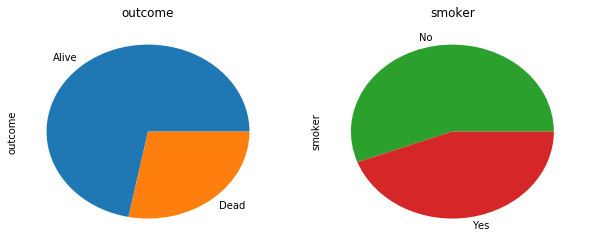

In [34]:
pp.figure(figsize=(10,4))
pp.subplot(1,2,1); smoking.outcome.value_counts().plot(kind='pie', colors=['C0','C1']); pp.title('outcome')
pp.subplot(1,2,2); smoking.smoker.value_counts().plot(kind='pie',  colors=['C2','C3']); pp.title('smoker')

# kind = pie for pie, bar for vertical bars and horizontal bars | color for bar and colors for pie

In [35]:
bysmoker

smoker  outcome
No      Alive      0.685792
        Dead       0.314208
Yes     Alive      0.761168
        Dead       0.238832
Name: outcome, dtype: float64

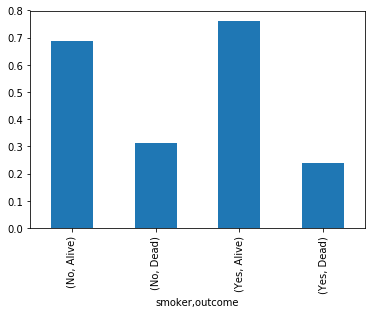

In [37]:
bysmoker.plot(kind='bar')

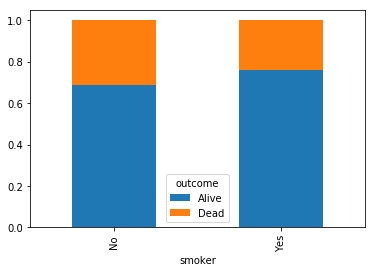

In [38]:
bysmoker.unstack().plot(kind='bar', stacked=True)

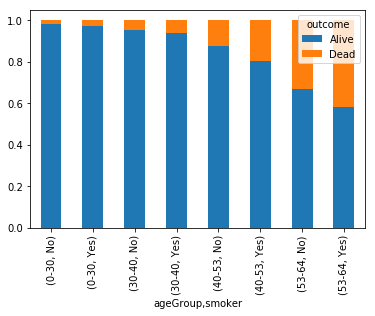

In [39]:
byage.unstack().plot(kind='bar', stacked=True)

In [41]:
byage.unstack().drop('Dead', axis=1).unstack()

outcome      Alive          
smoker          No       Yes
ageGroup                    
0-30      0.981818  0.975610
30-40     0.955224  0.940678
40-53     0.876106  0.802395
53-64     0.669291  0.580645

In [43]:
byage2 = byage.unstack().drop('Dead', axis=1).unstack()

byage2.columns = ["No", "Yes"]
byage2.columns.name = "smoker"

In [44]:
byage2

smoker,No,Yes
ageGroup,,
0-30,0.981818,0.975610
30-40,0.955224,0.940678
40-53,0.876106,0.802395
53-64,0.669291,0.580645


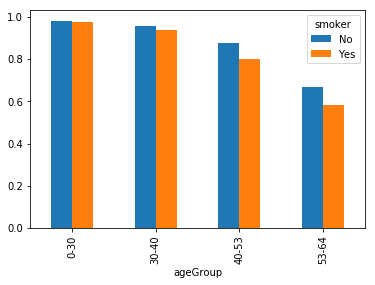

In [45]:
byage2.plot(kind='bar')

In [ ]:
# Here we see that in every age group, non smokers have a slight 